<a href="https://colab.research.google.com/github/megan-the-astronomer/ASTR229/blob/main/tables_conditionals_loops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digging deeper: tabular data, conditionals, and loops

Now that you had a chance to explore python and astropy tools for looking at images, let's look at some tools for looking at data tables (tabular data). We'll also explore control structures that allow you to tell the computer to make choice (e.g., if a condition is true then do an action) and/or repeat certain actions (e.g., for a given list of files, perform an action on each of them).

Let's start by importing some packages we know we'll be using in this exercise. You can always import additional packages later on using the same syntax.

In [ ]:
# start by importing a few essential packages
import numpy as np
import matplotlib.pyplot as plt
import astropy

from astropy.io import fits
from astropy.table import Table

# Working with data tables

Often, we want to read in a table of data - model values, a list of measurements from another paper, etc. For this example, we'll look at some stellar data using the astropy table module.

The data tables are in the ```ASTR229_data``` folder on google drive, so start by giving colab access.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Start with the file 'ms.dat'. We'll look at the others in a little bit.

If you double click on the 'ms.dat' filename, it will open in a panel to the right of your code in colab. Take a look at the file - notice that it has four columns, the columns are separated by the ```;``` character, etc.

Use Table.read to read the file into python. In theory you can just give it the filename but in practice, things tend to go more smoothly if your provide a little more information about the file. We'll specify that the format is [ascii](https://networkencyclopedia.com/ascii-file/), the character used to separate columns (the delimiter) is ```;``` and the comment character is ```#```. Be sure to look at the documentation to see what other keywords you can specify when in reading in a table.

In [ ]:
dat = Table.read('/content/drive/MyDrive/ASTR229_data/stellar_data/ms.dat', format='ascii.csv', delimiter=';', comment='#')

In [ ]:
dat

Spectral Type,Temperature (K),Absolute Magnitude,Luminosity (in solar luminosities)
str2,int64,str5,float64
O5,54000,-10.0,846000.0
O6,45000,-8.8,275000.0
O7,43300,-8.6,220000.0
O8,40600,-8.2,150000.0
O9,37800,-7.7,95000.0
B0,29200,-6.0,20000.0
B1,23000,-4.4,4600.0
B2,21000,-3.8,2600.0
B3,17600,-2.6,900.0


Just typing the table name will provide quite a bit of information. To print a formatted display, use ```.pprint()```.  

In [ ]:
dat.pprint()

Spectral Type Temperature (K) ... Luminosity (in solar luminosities)
------------- --------------- ... ----------------------------------
           O5           54000 ...                           846000.0
           O6           45000 ...                           275000.0
           O7           43300 ...                           220000.0
           O8           40600 ...                           150000.0
           O9           37800 ...                            95000.0
           B0           29200 ...                            20000.0
           B1           23000 ...                             4600.0
           B2           21000 ...                             2600.0
           B3           17600 ...                              900.0
           B5           15200 ...                              360.0
          ...             ... ...                                ...
           M5            3200 ...                              0.026
           M6            3100 ... 

There are several functions to explore the properties of your table. Try typing ```dat.``` and letting your cursor linger to see a list of options (you may need to retype the command in colab for the suggested completions). If you are running things locally, you may need to hit the ```tab``` key to see possible completions.

The ```dir()``` function we saw in last week's assignment is also really useful for getting to know your table.

In [ ]:
dir(dat)

['Column',
 'ColumnClass',
 'MaskedColumn',
 'Row',
 'TableColumns',
 'TableFormatter',
 '__array__',
 '__bytes__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_repr_',
 '_check_names_dtype',
 '_column_class',
 '_convert_col_for_table',
 '_convert_data_to_col',
 '_convert_string_dtype',
 '_copy_indices',
 '_first_colname',
 '_get_col_cls_for_table',
 '_init_from_cols',
 '_init_from_dict',
 '_init_from_list',
 '_init_from_list_of_dicts',
 '_init_from_ndarray',
 '_init_indices',
 '_ipython_key_completions_',
 '_is_li

In [ ]:
dat.colnames

['Spectral Type',
 'Temperature (K)',
 'Absolute Magnitude',
 'Luminosity (in solar luminosities)']

To see the values of a given column of data, you can call it by name. For example:

In [ ]:
dat['Luminosity (in solar luminosities)']

<Column name='Luminosity (in solar luminosities)' dtype='float64' length=55>
846000.0
275000.0
220000.0
150000.0
 95000.0
 20000.0
  4600.0
  2600.0
   900.0
   360.0
   250.0
   175.0
     ...
   0.038
   0.026
   0.022
   0.014
  0.0093
  0.0074
  0.0027
 0.00026
 0.00017
 2.1e-05
 5.5e-06

This is essentially a list of values and it can be indexed in the same way.

In [ ]:
dat['Luminosity (in solar luminosities)'][0]

np.float64(846000.0)

In [ ]:
dat['Luminosity (in solar luminosities)'][0:10]

<Column name='Luminosity (in solar luminosities)' dtype='float64' length=10>
846000.0
275000.0
220000.0
150000.0
 95000.0
 20000.0
  4600.0
  2600.0
   900.0
   360.0

You can also use the table columns as inputs to make a plot. Try making a plot of temperature versus luminosity using the table data.

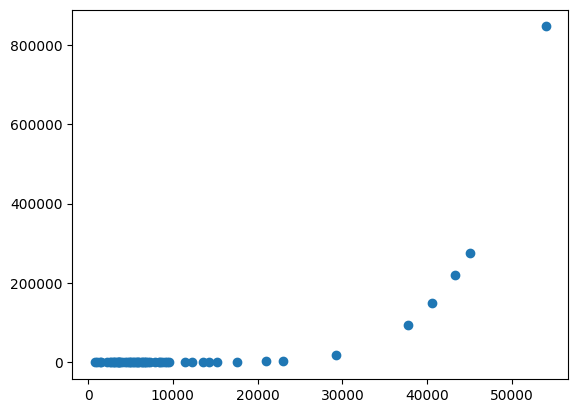

In [ ]:
plt.scatter(dat['Temperature (K)'], dat['Luminosity (in solar luminosities)'])

Be careful! The computer will do what you tell it to do - even if it doesn't make much sense.

For example, try plotting the spectral type (a string!) versus the luminosity.

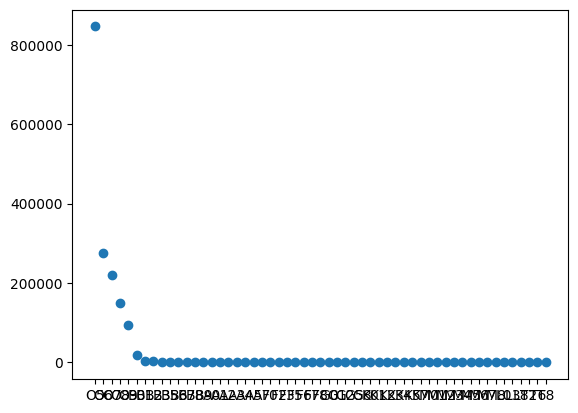

In [ ]:
plt.scatter(dat['Spectral Type'], dat['Luminosity (in solar luminosities)'])

Python will still make the plot but it's hard to know what it means.

Remember, you can use ```type()``` to figure out the data type.

In [ ]:
# this will tell you that your table column is a table column
type(dat['Temperature (K)'])

astropy.table.column.Column

In [ ]:
# this will tell you the data type
type(dat['Temperature (K)'][0])

numpy.int64

In [ ]:
type(dat['Spectral Type'][0])

numpy.str_

We can convert columns of data to numpy arrays and even specify the data type. This can be especially useful if you then want to do math on the data values.

Let's try it with the temperature and luminosity.

In [ ]:
temps = np.array(dat['Temperature (K)']).astype(float)
lums = np.array(dat['Luminosity (in solar luminosities)']).astype(float)

Plot the temperature and luminosity but this time in log so it is easier to see the range of data.

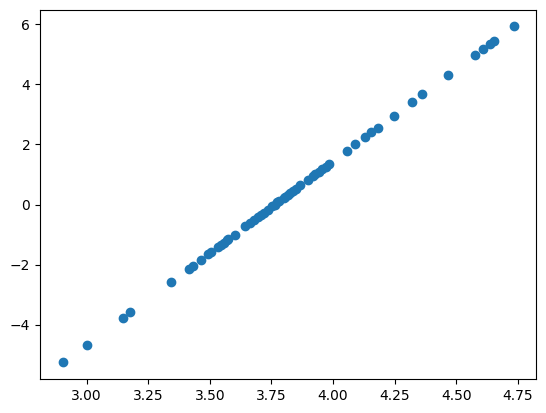

In [ ]:
plt.scatter(np.log10(temps), np.log10(lums))

There are several things we can do to make this plot better.

First, use ```xlim``` to change the direction of the x-axis to conform to historical convention.

Then, add labels to each axis.

Finally, play around with the size and shape of the plot symbols, adding labels (e.g., an arrow to show the direction that temperature increases), etc. Not sure where to start? Take a look at the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) - be sure to scroll to the bottom of the page to look for examples.

Text(0, 0.5, 'log(Luminosity [Solar Luminosities])')

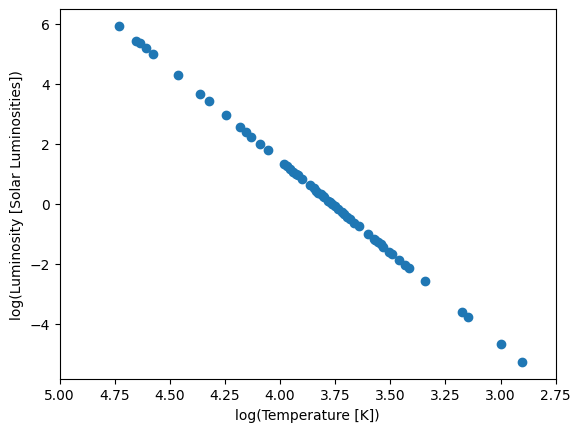

In [ ]:
plt.scatter(np.log10(temps), np.log10(lums))
plt.xlim([5.0, 2.75])
plt.xlabel('log(Temperature [K])')
plt.ylabel('log(Luminosity [Solar Luminosities])')

Ideally, table data are well behaved. Many journals now require table data to be provided in machine-readable format. However, there are often cases where interesting data is imperfectly formatted. The ```Absolute Magnitude``` column in our table is a great example.

In [ ]:
mags = dat['Absolute Magnitude']

In [ ]:
mags

<Column name='Absolute Magnitude' dtype='str5' length=55>
-10.0
 -8.8
 -8.6
 -8.2
 -7.7
 -6.0
 -4.4
 -3.8
 -2.6
 -1.6
 -1.2
-0.84
  ...
  8.3
  8.7
  8.9
  9.4
  9.9
    *
    *
    *
    *
    *
    *

Notice that the last few values are ```*```. In this case, that means that the data are missing. Careful though - python still lets you plot it...

(5.0, 2.75)

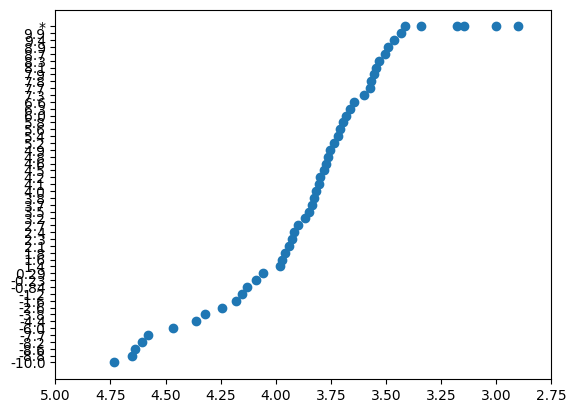

In [ ]:
plt.scatter(np.log10(temps), mags)
plt.xlim([5.0,2.75])

We can get a more sensible plot if we convert the numbers in the ```Absolute Magnitude``` column from ```string``` to ```float```. This is not quite as straight-forward as it was for temperature and luminosity because python doesn't automatically know that the ```*``` character is being used to signify missing data in this particular table.

In [ ]:
np.array(mags).astype(float)

ValueError: could not convert string to float: np.str_('*')

For now, we'll just ignore the rows that are missing absolute magnitudes. To find the rows with good data, we'll use the ```np.where()``` function.

First a quick introduction to python's comparison operators. These allow you to compare two things and evaluate whether the comparison is true or false. The simplest example is ```<``` and ```>```.

In [ ]:
9 > 3

True

In [ ]:
100 < 2

False

Other useful operators include greater than or equal to ```>=``` and not equal to ```!=```. These can be quite useful so be sure to [take a look](https://www.pythontutorial.net/python-basics/python-comparison-operators/) at some of the other options.

Use the comparison operator with the ```np.where()``` function to find which rows do or do not have an absolute magnitude.


In [ ]:
has_mag = np.where(mags != '*')

Now we can convert the absolute magnitudes - where we have data - to floating point numbers.

In [ ]:
mags_float = np.array(mags[has_mag]).astype(float)

Now make the plot. Note that we reversed both the x- and y-axes to conform with astronomical convention.

(12.0, -12.0)

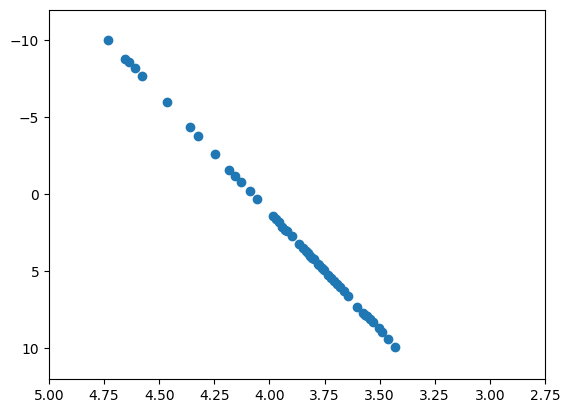

In [ ]:
plt.scatter(np.log10(temps[has_mag]), mags_float)
plt.xlim([5.0,2.75])
plt.ylim([12.0,-12.0])

Notice that we used the ```has_mag``` indexes on the temperature array too - why? Because we only want the temperatures that correspond to the sources where we also know the absolute magnitude.

In this case, all the missing data was at the end of the file. However, python will not make assumptions about which values to keep when arrays are of unequal size. Try making the plot again without indexing the temperature array.

ValueError: x and y must be the same size

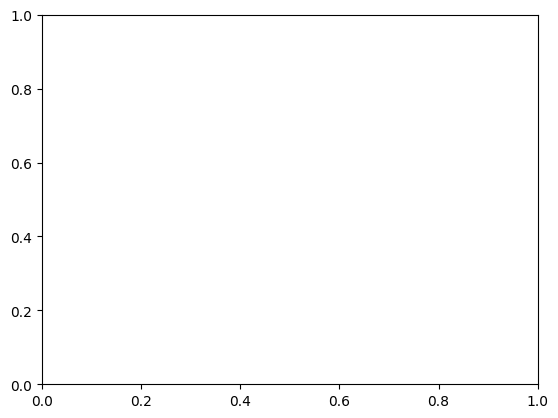

In [ ]:
plt.scatter(np.log10(temps), mags_float)

# Conditionals

Recommended reading: https://philuttley.github.io/prog4aa/11-cond/index.html

Conditionals allow you to tell the computer to make a decision based on a condition. Let's use the examples of comparison operators from earlier in a conditional statement.

In [ ]:
if 9 > 3: print("hey, I'm pretty good at math")

hey, I'm pretty good at math


In [ ]:
if 100 < 2: print('yikes! I need to study!')

Notice that the first conditional results in the printed statement because it is true that $9>3$. The second doesn't print anything because the condition ($100 < 2$) is false.

These are examples of ```if``` statements. The structure is ```if``` a condition is true then (```:```) execute an action or a list of actions.

Try writing an ```if``` statement to tell you if the data table ```dat``` has more than two columns.

In [ ]:
dat.columns

<TableColumns names=('Spectral Type','Temperature (K)','Absolute Magnitude','Luminosity (in solar luminosities)')>

In [ ]:
len(dat.columns)

4

In [ ]:
if len(dat.columns) > 2:
  print('the table has more than two columns')

the table has more than two columns


You can also combine conditions using logical operators like ```and```, ```or```, and ```not```. For example:

In [ ]:
len(dat)

55

In [ ]:
if (len(dat) < 10) and (len(dat.columns) > 2):
  print('this is a short and small table')
else:
  print('this table is not so short and not so small')

this table is not so short and not so small


These are kind of silly examples but these can be especially powerful when combined with loops which we will introduce next.

# Loops

Recommended reading: https://philuttley.github.io/prog4aa/07-loops/index.html


Loops allow you to repeat actions quickly and easily.  

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
for num in np.arange(10):
  print(num)

0
1
2
3
4
5
6
7
8
9


Notice the formatting! You can give python multiple commands inside a ```for``` loop. The indentation tells python that those commands are part of the loop. No indentation indicates the end of the actions to be done in the loop.

In [ ]:
for num in np.arange(10):
  print('counting...')
  print(num)
  print(' ')
print('done counting')

counting...
0
 
counting...
1
 
counting...
2
 
counting...
3
 
counting...
4
 
counting...
5
 
counting...
6
 
counting...
7
 
counting...
8
 
counting...
9
 
done counting


# Putting the pieces together

We want to include additional data in our plot, but one or more of these tables is less well-behaved than the ```ms.dat``` data.

Together, loops and conditionals can help us reformat the data so we can add it to our plot.

Let's look at the ```sg.dat``` table.
First, read in the data.

In [ ]:
sg_table = Table.read('/content/drive/MyDrive/ASTR229_data/stellar_data/sg.dat', format='ascii.csv', delimiter=';')

Be sure to take a look at the data - either by double clicking on the filename or using the formatted print to screen function

In [ ]:
sg_table.pprint()

Spectral Type Temperature (K) ... Luminosity (in solar luminosities)
------------- --------------- ... ----------------------------------
           B0          21,000 ...                            320,000
           B1          16,000 ...                            280,000
           B2          14,000 ...                            220,000
           B3          12,800 ...                            180,000
           B5          11,500 ...                            140,000
           B6          11,000 ...                             98,000
           B7          10,500 ...                             82,000
           B8          10,000 ...                             73,000
           B9            9700 ...                             61,000
           A0            9400 ...                             50,600
           A1            9100 ...                             44,000
           A2            8900 ...                             40,000
           A5            8300 ... 

Notice how the temperature and luminosity are written in the file. I can already see that the formatting is going to cause me problems. Python will recognize ```21000``` as a number but not ```21,000```.

In [ ]:
sg_table['Temperature (K)']

<Column name='Temperature (K)' dtype='str6' length=22>
21,000
16,000
14,000
12,800
11,500
11,000
10,500
10,000
  9700
  9400
  9100
  8900
  8300
  7500
  7200
  6800
  6150
  5800
  5500
  5100
  5050
  4900

The commas in the numbers mean that python has interpreted the data in the temperature column as ```str``` not ```float```. The commas also mean that we can't just do a type conversion.

In [ ]:
sg_temps = np.array(sg_table['Temperature (K)']).astype(float)

ValueError: could not convert string to float: np.str_('21,000')

To get the data into a format we can use, we need to remove the commas. You could brute-force it and edit the file by hand but that quickly becomes time-consuming for longer files.

Instead, let's use a loop because we need to repeat the same action (removing the comma) many times. Inside the loop, we'll also use a conditional statement because we don't need to correct every number - just the ones with a comma messing up the formatting.

In [ ]:
# make an empty list to collect the reformatted temperatures
sg_temps = []

# create a variable for the character we want to remove
# assign it with ',' - note the format!
chk_char = ','

# write a for loop to check all the temperature values
for tt in sg_table['Temperature (K)']:
  # if the temperature has a comma, remove it
  if chk_char in tt:
    sg_temps.append(tt.replace(chk_char, ''))
  # if the temperature *doesn't* have a comma, no need to edit
  else:
    sg_temps.append(tt)

Now we can check our reformatted list of temperatures.

In [ ]:
sg_temps

['21000',
 '16000',
 '14000',
 '12800',
 '11500',
 '11000',
 '10500',
 '10000',
 np.str_('9700'),
 np.str_('9400'),
 np.str_('9100'),
 np.str_('8900'),
 np.str_('8300'),
 np.str_('7500'),
 np.str_('7200'),
 np.str_('6800'),
 np.str_('6150'),
 np.str_('5800'),
 np.str_('5500'),
 np.str_('5100'),
 np.str_('5050'),
 np.str_('4900')]

Notice that these are all strings but the way this is reported looks different for the values we edited versus the ones we didn't. These are pretty much interchangeable - more information for the interested reader [here](https://numpy.org/doc/stable/user/basics.types.html#relationship-between-numpy-data-types-and-c-data-types).

In [ ]:
type(sg_temps)

list

In [ ]:
type(sg_temps[0])

str

Finally, we should be able to convert the reformatted temperatures to an array of floating point numbers.

In [ ]:
np.array(sg_temps).astype(float)

array([21000., 16000., 14000., 12800., 11500., 11000., 10500., 10000.,
        9700.,  9400.,  9100.,  8900.,  8300.,  7500.,  7200.,  6800.,
        6150.,  5800.,  5500.,  5100.,  5050.,  4900.])

Notice that we have the same problem with the luminosities...

In [ ]:
sg_lums = sg_table['Luminosity (in solar luminosities)']

In [ ]:
sg_lums

<Column name='Luminosity (in solar luminosities)' dtype='str10' length=22>
   320,000
   280,000
   220,000
   180,000
   140,000
    98,000
    82,000
    73,000
    61,000
    50,600
    44,000
    40,000
    36,000
    20,000
    18,000
    16,000
    12,000
      9600
      9500
      9800
    11,000
12,000,000

Write your own code to reformat the luminosities.

Then add the temperatures and luminosities from the ```sg.dat``` and ```giants.dat``` files to your plot of temperature and luminosity.

Play around with different plot [markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) and symbol colors to show which data points come from each file.

Label the different datasets by adding [annotations](https://matplotlib.org/stable/users/explain/text/annotations.html) to your plot.

In [ ]:
# your code here

# Beyond lists

Recommended reading: https://philuttley.github.io/prog4aa/10-dict-tup-set/index.html


We've mostly looked at lists as a way to collect data (e.g., in the example above we collected our reformatted temperatures in a list). There are a few other
other containers for information that you may find useful: sets, tuples, and dictionaries.

**Sets**: contain values that are unique and unordered, similar to mathematical sets.

**Tuples**: are an immutable version of a list.

**Dictionaries**: are similar to lists but are indexed using keys.



# Sets

A set contains unique, unordered data. The set can be changed but values within a set cannot be changed.

You can make a set with a list of spectral types using the ```set()``` function.

In [ ]:
SpT = set(['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8'])

In [ ]:
SpT

{'M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8'}

Note that sets are printed with curly braces ```{}``` whereas lists have square brackets ```[]```.

With better telescopes, we discovered even later spectral types. We can add L-dwarfs to the set of spectral types using ```.add()```.

In [ ]:
SpT.add('L0')

In [ ]:
SpT

{'L0', 'M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8'}

An example use from Anthony (TA fall 2025): sets are a way to merge two tables with the names of habitable exoplanets so that there are no duplicates. (note: this could also be done with standard table join/merge functions).


# Tuples

Tuples are like lists but they cannot be changed. Tuples print with parentheses ```()``` instead of square brackets ```[]```.

In [ ]:
my_stars = ('M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8')

In [ ]:
my_stars

('M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8')

Tuples can be indexed like lists but not modified. For example, I cannot add any L-types to my list of objects.

In [ ]:
my_stars.append('L0')

AttributeError: 'tuple' object has no attribute 'append'

# The zip function

The zip function creates a tuple from, e.g, two lists, that can only be iterated through once. This can be really useful in a ```for``` loop.

Sound confusing? This is more easily explained with an example.
Say we want to make a list of stars to observe. To pick good targets, we need to know where they are in the sky, how bright they are, etc. Let's look at a simple example where we just check whether an obect might be up at night (for what time of year??), then print it's name. This is easy to do with ```zip()```.  

In [ ]:
names = ['Aldebaran', 'Alderamin', 'Algol', 'Alhena', 'Almach', 'Alnilam',
         'Alnitak', 'Alpheratz', 'Altair', 'Bellatrix']

RAh = [4., 21.,  3.,  6.,  2.,  5.,  5.,  0., 19.,  5.]
Decd = [16., 62., 40., 16., 42., -1., -1., 29.,  8.,  6.]

In [ ]:
for nm, ra in zip(names, RAh):
  if (ra > 18) or (ra < 6):
    print('we might be able to observe '+nm+' tonight')
  else:
    print('not looking promising to observe '+nm+' tonight')

we might be able to observe Aldebaran tonight
we might be able to observe Alderamin tonight
we might be able to observe Algol tonight
not looking promising to observe Alhena tonight
we might be able to observe Almach tonight
we might be able to observe Alnilam tonight
we might be able to observe Alnitak tonight
we might be able to observe Alpheratz tonight
we might be able to observe Altair tonight
we might be able to observe Bellatrix tonight


# Dictionaries

Dictionaries are like lists in that they can collect information, including data of different types. Their use is more similar to the table example above because information in a dictionary is accessed with keys. For example, you could make a dictionary to contain the properties of a given star.

In [ ]:
Vega = {'Dist_pc':7.68, 'Spec_Type':'A0Va', 'Mass_Msol':2.14, 'Lum_Lsol':40.12}


In [ ]:
Vega

{'Dist_pc': 7.68, 'Spec_Type': 'A0Va', 'Mass_Msol': 2.14, 'Lum_Lsol': 40.12}

Notice the format is ```'key': value``` in a dictionary. A dictionary can be initiated by wrapping values in curly braces ```{}``` or using the ```dict()``` function.

In [ ]:
Arcturus = dict([('Mass_Msol',1.08), ('Lum_Lsol',170), ('Dist_pc',11.26), ('Spec_Type','K0III')])

In [ ]:
Arcturus

{'Mass_Msol': 1.08, 'Lum_Lsol': 170, 'Dist_pc': 11.26, 'Spec_Type': 'K0III'}

Information is called from a dictonary using the key. For example:

In [ ]:
Vega['Mass_Msol']

2.14

Use the ```.keys()``` function to get a list of keys in your dictionary.

In [ ]:
Vega.keys()

dict_keys(['Dist_pc', 'Spec_Type', 'Mass_Msol', 'Lum_Lsol'])

Your turn: use the data in ```ms.dat``` to make a dictionary with the spectral type, temperature, and luminosity of all stars in the table.

In [ ]:
# your code here

# Skills practice - dealing with missing data

Earlier in this assignment, we dealt with missing data (denoted with ```*``` in the table) by ignoring it. This usually isn't the best way to deal the problem. Notice that only one column of data are missing data in the ```ms.dat``` file, so we are throwing away a lot of information if we ignore the entire row.

Write your own code to replace missing data in the table with ```NaN```s (a ```NaN``` is 'not a number'). Some helpful tips for dealing with ```NaN```s in the [numpy documentation](https://numpy.org/doc/stable/reference/constants.html).

Then make your plot with luminosity on the left y-axis and absolute magnitude on the right y-axis. What should you do about points that have a luminosity but not an absolute magntiude? Use a different plot symbol for those points. Be sure to explain in either the plot legend or your figure caption.

Add the data from the ```sg.dat``` and ```giants.dat``` tables. Include the labels from earlier.

When you include the figure in your writeup, make sure that all symbols and labels are large enough to see / read without zooming in.